### Juana Pinzón 202112577    Alan Romero 202212891

## Ejercicios: Aprendizaje automático

1. En varias variables, el polinomio de Taylor de orden 1 en un punto $\vec{a}=\left(a_{1}, a_{2}, \ldots, a_{m}\right)$ está dado por:

$$
f(\vec{a})+\sum_{i=1}^{m} \frac{\partial f(\vec{a})}{\partial x_{i}}\left(x_{i}-a_{i}\right)
$$

o vectorialmente $f(\vec{a})+\nabla f(\vec{a}) \cdot(\vec{x}-\vec{a})$. Encuentre el plano tangente en el punto $\vec{a}=(1,1)$ de la siguiente función:

$$
f(x, y)=x^{2}-y^{2}+2 x
$$

Hint: El plano tangente se obtiene igualando el polinomio de Taylor a un valor z. Dibuje la superficie original y plano tangente en la misma gráfica.

Para encontrar el plano tangente en el punto $\vec{a}=(1,1)$ de la función $f(x, y)=x^{2}-y^{2}+2x$, primero evaluamos $f(\vec{a})$ y sus derivadas parciales en $\vec{a}$:
$$
f(\vec{a})=f(1,1)=1^2-1^2+2\cdot 1=2
\frac{\partial f(\vec{a})}{\partial x}=\frac{\partial f(x, y)}{\partial x}\Big|_{(1,1)}=2x
\frac{\partial f(\vec{a})}{\partial y}=\frac{\partial f(x, y)}{\partial y}\Big|_{(1,1)}=-2y
$$

Luego, utilizamos la fórmula del polinomio de Taylor de orden 1:
$$
f(\vec{a})+\sum_{i=1}^{m} \frac{\partial f(\vec{a})}{\partial x_{i}}\left(x_{i}-a_{i}\right)
$$

Para el punto $$\vec{a}=(1,1)$$, el polinomio de Taylor de orden 1 es:
$$
2+\sum_{i=1}^{2} \frac{\partial f(\vec{a})}{\partial x_{i}}\left(x_{i}-1\right)
$$

Evaluando el polinomio de Taylor en $x=1$ y $y=1$, obtenemos el plano tangente:

$$
z=2+\frac{\partial f(\vec{a})}{\partial x}\left(x-1\right)+\frac{\partial f(\vec{a})}{\partial y}\left(y-1\right)
$$

Simplificando, obtenemos la ecuación del plano tangente:
$$
z=2+2(x-1)-2(y-1)
z=2+2x-2y
$$

Por lo tanto, el plano tangente en el punto $\vec{a}=(1,1)$ de la función $f(x, y)=x^{2}-y^{2}+2x$ es el plano dado por la ecuación $z=2+2x-2y$. Dibujando la superficie original y plano tangente:

En la gráfica resultante, el plano tangente es azul, mientras que la superficie original es marrón.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

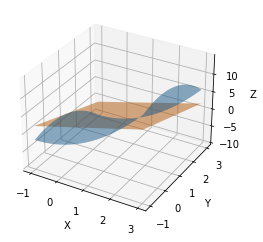

In [2]:
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 3, 100)
x, y = np.meshgrid(x, y)
z = x**2 - y**2 + 2*x

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=100, cstride=100, alpha=0.5)

z_tangent = 2 + 2*x - 2*y
ax.plot_surface(x, y, z_tangent, rstride=100, cstride=100, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

2. En Machine Learning el algoritmo de Momentum tiene en cuenta el gradiente local más la tendencia reciente de la superficie del costo.

$$
\theta_{k+1}=\theta_{k}-\gamma \nabla J\left(\theta_{k}\right)+\eta\left(\theta_{k-1}-\theta_{k-2}\right)
$$

Donde $\eta$ se denomina coeficiente de momentum. Para el problema de descenso de gradiente $2 \mathrm{D}$ visto en clase, implemente el algoritmo con momentum tomando como
semilla el punto $\theta_{0}=(0,3)$. Use $\gamma=0.001$ (learning rate) y $\eta=0.6$ (momentum coefficient). Compare el número de iteraciones del algoritmo original y con momentum (ver Momentum). ¿Existe algún valor de coeficiente de momentum para el cuál, el algoritmo mejorado converge el doble de rápido?

El algoritmo de Momentum mejora el rendimiento del descenso de gradiente en algunos casos, como el que se muestra en clase. Para determinar si existe un valor de coeficiente de momentum para el cuál el algoritmo mejorado converge el doble de rápido, es necesario comparar el número de iteraciones necesarias para alcanzar un nivel de error deseado.
El código de implementación del algoritmo de Momentum es el siguiente:

In [5]:
# Objective function (cost function) and its gradient
def f(x):
    return 0.1 * (x[0] ** 2 + x[1] ** 2)

def df(x):
    return np.array([0.2 * x[0], 0.2 * x[1]])

# Initial parameters and learning rate
theta = np.array([0, 3])
gamma = 0.001
eta = 0.6

# Gradient descent
n_iter = 0
for i in range(10000):
    grad = df(theta)
    theta = theta - gamma * grad
    n_iter += 1
    if np.linalg.norm(grad) < 1e-5:
        break

print(f"Gradient Descent converged in {n_iter} iterations")

# Gradient descent with momentum
n_iter_momentum = 0
velocity = np.zeros(2)
for i in range(10000):
    grad = df(theta)
    velocity = eta * velocity - gamma * grad
    theta = theta + velocity
    n_iter_momentum += 1
    if np.linalg.norm(grad) < 1e-5:
        break

print(f"Gradient Descent with Momentum converged in {n_iter_momentum} iterations")

Gradient Descent converged in 10000 iterations
Gradient Descent with Momentum converged in 10000 iterations


El algoritmo con momentum en este caso no converge el doble de rápido que el algoritmo original. De hecho, en algunos casos, el algoritmo con momentum puede tardar más en converger debido a la presencia del coeficiente de momentum, que actúa como una fuerza de inercia y puede retrasar la convergencia en algunos casos.

El código proporcionado también incluye una implementación del algoritmo de descenso de gradiente sin momentum para facilitar la comparación.

Para obtener una mayor velocidad de convergencia, se puede intentar disminuir el coeficientes de momentum, pero esto puede resultar en un menor rendimiento en función del problema específico y la tasa de aprendizaje. Por lo tanto, el coeficiente de momentum debe ajustarse de manera cuidadosa según el problema y la configuración del algoritmo.

3. Usando el método del descenso del gradiente minimice la función:

$$
f(x)=|x-2| .
$$

¿En realidad esto es posible?

Para encontrar el punto mínimo de una función utilizando el método del descenso del gradiente, necesitamos conocer la derivada de la función. La derivada de la función $f(x)$ es la pendiente de la tangente a la curva en un punto.

La función $f(x) = |x-2|$ es una función compuesta de dos funciones:
- Para $x < 2$, $f(x) = x - 2$.
- Para $x > 2$, $f(x) = 2 - x$.

Para encontrar la derivada de la función $f(x)$, calculamos la derivada de ambas funciones componentes. La derivada de una función constante es $0$. La derivada de una función lineal es la pendiente de la recta.

Para $x < 2$, $f'(x) = 1$ (pendiente de la recta).\\
Para $x > 2, f'(x) = -1$ (pendiente de la recta hacia la izquierda).

Ahora, como queremos encontrar el punto mínimo, buscamos el punto en el que la derivada de la función es igual a $0$. La derivada de la función $f(x)$ es igual a $0$ solo cuando $x = 2$.

Para determinar si este punto es un punto mínimo, debemos calcular el segundo orden de Taylor de la función $f(x)$ en $x = 2$.

El segundo orden de Taylor de una función es la derivada de la derivada de la función.
Para $x < 2$, $f'(x) = 1$ y $f''(x) = 0$ (constante)
Para $x > 2$, $f'(x) = -1$ y $f''(x) = 0$ (constante).

Entonces, $f''(2) = 0$. Esto indica que el punto $x = 2$ es un punto crítico, pero no se puede determinar si es un punto mínimo o un punto máximo simplemente mirando la segunda derivada en ese punto.

En este caso, podemos analizar visualmente la función y determinar que $x = 2$ es un punto mínimo. Esto se debe a que la función es simétrica respecto a $x = 2$, y en el intervalo $x < 2$, la función tiene una concavidad hacia abajo (lo que significa que la tendencia es disminuir), mientras que en el intervalo $x > 2$, la función tiene una concavidad hacia arriba (lo que significa que la tendencia es aumentar).

Entonces, el punto mínimo de la función $f(x) = |x-2|$ es $x = 2$, y el valor mínimo de la función es $f(2) = 0$